In [1]:
from validation.FullExperimental import FullExperimental
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = FullExperimental()
df.rename(columns={"v [X,SX,Y,SY]": "delta"}, inplace=True)

# database
layers = df["layers"].values
layers[0] = ["Y","Y"]
df["layers"] = layers

df = df.iloc[1:]

df

Et [GPa]             Eb [GPa]              t [mm]               b [mm]  \
          mean       std       mean       std      mean       std       mean   
Name                                                                           
TFP2  2.258503  0.065626   9.869501  0.780113  4.700000  0.000000  25.566667   
TFP3  2.000437  0.004435   9.222003  0.495965  4.833333  0.057735  25.400000   
TFP4  2.451362  0.114353  10.181815  0.770635  4.700000  0.000000  25.666667   
TFP5  1.626582  0.120272   6.143105  0.161637  5.700000  0.000000  25.166667   
TFP6  1.739870  0.067515   7.798060  0.334186  5.600000  0.000000  25.033333   

                     layers     Vc  
           std                      
Name                                
TFP2  0.057735       [Y, X]  0.164  
TFP3  0.173205      [Y, SX]  0.135  
TFP4  0.152753      [Y, SY]  0.144  
TFP5  0.152753  [Y, SX, SY]  0.146  
TFP6  0.635085   [Y, X, SY]  0.180

In [3]:
df_old = df.copy()

df_Et = df["Et [GPa]"]["mean"]
df_Eb = df["Eb [GPa]"]["mean"]
df_t = df["t [mm]"]["mean"]
df_b = df["b [mm]"]["mean"]

df = df.drop(columns=["Et [GPa]", "Eb [GPa]", "t [mm]", "b [mm]"],level=0)
df["Et [GPa]"] = df_Et
df["Eb [GPa]"] = df_Eb
df["t [mm]"] = df_t
df["b [mm]"] = df_b
df


,layers,Vc,Et [GPa],Eb [GPa],t [mm],b [mm]
,,,,,,
Name,,,,,,
TFP2,"[Y, X]",0.164,2.258503,9.869501,4.700000,25.566667
TFP3,"[Y, SX]",0.135,2.000437,9.222003,4.833333,25.400000
TFP4,"[Y, SY]",0.144,2.451362,10.181815,4.700000,25.666667
TFP5,"[Y, SX, SY]",0.146,1.626582,6.143105,5.700000,25.166667
TFP6,"[Y, X, SY]",0.180,1.739870,7.798060,5.600000,25.033333


### Experimental Data

In [4]:
df_old

Et [GPa]             Eb [GPa]              t [mm]               b [mm]  \
          mean       std       mean       std      mean       std       mean   
Name                                                                           
TFP2  2.258503  0.065626   9.869501  0.780113  4.700000  0.000000  25.566667   
TFP3  2.000437  0.004435   9.222003  0.495965  4.833333  0.057735  25.400000   
TFP4  2.451362  0.114353  10.181815  0.770635  4.700000  0.000000  25.666667   
TFP5  1.626582  0.120272   6.143105  0.161637  5.700000  0.000000  25.166667   
TFP6  1.739870  0.067515   7.798060  0.334186  5.600000  0.000000  25.033333   

                     layers     Vc  
           std                      
Name                                
TFP2  0.057735       [Y, X]  0.164  
TFP3  0.173205      [Y, SX]  0.135  
TFP4  0.152753      [Y, SY]  0.144  
TFP5  0.152753  [Y, SX, SY]  0.146  
TFP6  0.635085   [Y, X, SY]  0.180

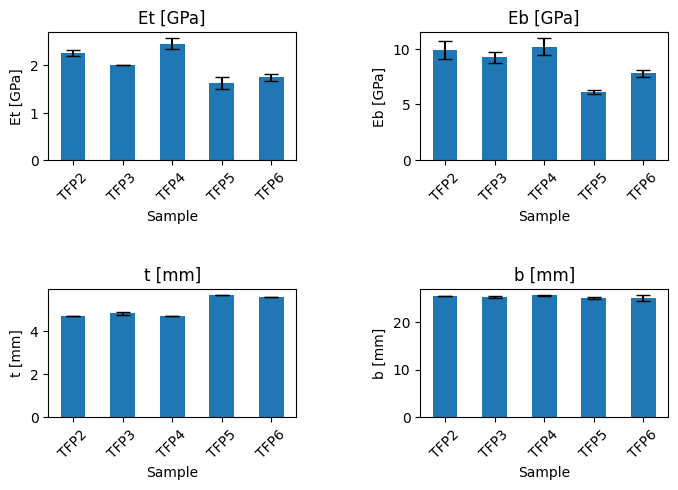

In [5]:
# bar plot 
# subplot 

# plot with error bars

fig = plt.figure()
#size 
fig.set_size_inches(8, 5)
# subplot padding
fig.subplots_adjust(hspace=1., wspace=0.5)
cols = ["Et [GPa]", "Eb [GPa]", "t [mm]", "b [mm]"]

for i, col in enumerate(cols):
    ax = fig.add_subplot(2, 2, i+1)
    df_old[col]["mean"].plot(kind='bar', yerr=df_old[col]["std"], capsize=5, ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")

    # rot label 45
    plt.xticks(rotation=45)

#### 1. Thickness Model
$$ \Tau (t_n,t_l,n_i) = t_n + 2t_l n_i $$
#### 2. Tensile Model

$$ \mathcal{E}_t(E_n,\vec{E_l},t_n,t_l, \mathcal{C}) = 
    \frac{E_n t_n + 2t_l \  ( \vec{\delta} \cdot \vec{E_l})}{t_t} $$
where: 
- $t_t = \Tau(t_n,t_l,n_i)$
- $n_i$ is the number of layers.
- $\delta = \mathcal{F}(\mathcal{C})$ is the function of the # of layers of each type.

#### 3. Bending Model
$$ \mathcal{E}_b(E_n,\vec{E_l},t_n,t_l) = 
\frac{E_n I_n + 2 \  (\vec{I_l} \cdot \vec{E_l})}{I_t} $$


In [6]:
from AnalyticalLayers.models import Tau_model,E_flexion,E_Tensile

In [7]:
longs = { "X": 70.0,
          "Y": 70.0,
          "SX": 40.0,
          "SY": 40.0 }

def Fraction_Carbon(radius,tn,tl,layers):

    A_RVE = 10*10 # mm^2

    ni = len(layers)
    tt = Tau_model(tn,tl,ni)
    v_tol = tt*A_RVE

    A_Section = np.pi * radius**2 # mm^2
    v_car = 2*A_Section*np.sum([ longs[ily] for ily in layers ])

    return v_car/v_tol

In [8]:
# Given tn,tl,En,El 
tn = 1.0
tl = 1.0
En = 1
El = np.array([1.0, 2.0, 3.0,4.0]) #  [ E_X , E_SX , EY , E_SY ]

In [9]:
# Add column to df Thickness Model Prediction 
radius = 0.29

ni = df["layers"].apply(len)
t_p = Tau_model(tn, tl, ni)
Et_p =  [E_Tensile(En, El, tn, tl, ilayer ) for ilayer in df["layers"]]
Eb_p =  [E_flexion(En, El, tn, tl, ilayer ) for ilayer in df["layers"]]
V_c = [ Fraction_Carbon(radius,tn,tl,ilayer) for ilayer in df["layers"]]
pred_df = pd.DataFrame({
    "t p [mm]"  : t_p,
    "Et p [GPa]": Et_p,
    "Eb p [GPa]": Eb_p,
    "Vc"       : V_c
})

error_df = pd.DataFrame({
    "t [mm]"  : 100*abs(df["t [mm]"]   - t_p )/df["t [mm]"]  ,
    "Et [GPa]": 100*abs(df["Et [GPa]"] - Et_p)/df["Et [GPa]"],
    "Eb [GPa]": 100*abs(df["Eb [GPa]"] - Eb_p)/df["Eb [GPa]"],
    "Vc"     : 100*abs(df["Vc"]      - V_c )/df["Vc"]
})
error_df

,t [mm],Et [GPa],Eb [GPa],Vc
Name,,,,
TFP2,6.382979,20.301175,85.652770,9.782654
TFP3,3.448276,9.975994,76.144012,13.887782
TFP4,6.382979,22.380958,62.992847,19.269795
TFP5,22.807018,66.870483,45.564611,22.443853
TFP6,25.000000,39.583505,60.781155,24.512017


In [10]:
df.round(2)

,layers,Vc,Et [GPa],Eb [GPa],t [mm],b [mm]
,,,,,,
Name,,,,,,
TFP2,"[Y, X]",0.16,2.26,9.87,4.70,25.57
TFP3,"[Y, SX]",0.14,2.00,9.22,4.83,25.40
TFP4,"[Y, SY]",0.14,2.45,10.18,4.70,25.67
TFP5,"[Y, SX, SY]",0.15,1.63,6.14,5.70,25.17
TFP6,"[Y, X, SY]",0.18,1.74,7.80,5.60,25.03


In [11]:
theta = lambda x: 0.5 + 0.5*np.tanh(100*x)
relu  = lambda x: x*theta(x)

In [12]:
from validation.experimental import manual_data

t_nucleo_exp = manual_data()["t_nucleo [mm]"]

In [13]:
nu = 0.4
def objetive(radius,tn,tl,En,El,give_pred=False):

    t_p = Tau_model(tn, tl, ni)


    Et_p =  [E_Tensile(En, El, tn, tl, ilayer ) for ilayer in df["layers"]]
    Et_p = np.array(Et_p)


    #El_f = 2*El/(1-nu**2)

    # El_f = 2*El
    El_f = El
    Eb_p =  [E_flexion(En, El_f, tn, tl, ilayer ) for ilayer in df["layers"]]
    #Eb_p = np.array(Eb_p)*(1-nu**2)

    Vc = [ Fraction_Carbon(radius,tn,tl,ilayer) for ilayer in df["layers"]]


    error_t   = 100*abs(df["t [mm]"]   - t_p )/df["t [mm]"]
    error_Et  = 100*abs(df["Et [GPa]"] - Et_p)/df["Et [GPa]"]
    error_Eb  = 100*abs(df["Eb [GPa]"] - Eb_p)/df["Eb [GPa]"]
    error_Vc  = 100*abs(df["Vc"]      - Vc )/df["Vc"]

    if give_pred:
        pred_df = pd.DataFrame({
            "t [mm]"  : t_p,
            "Et [GPa]": Et_p,
            "Eb [GPa]": Eb_p,
            "Vc"      : Vc   
        })

        error_df = pd.DataFrame({
            "t [%]"  : error_t,
            "Et [%]": error_Et,
            "Eb [%]": error_Eb,
            "Vc [%]": error_Vc
        })
        return pred_df, error_df
    else:

        L_t  = (error_t**2).mean()
        L_Et = (error_Et**2).mean()
        L_Eb = (error_Eb**2).mean()
        L_Vc = (error_Vc**2).mean()

        # En < all(El)
        L_mul = 0*1e3*relu( En - np.max(El) )

        return  L_t + L_Eb + 0*L_Et + L_mul + L_Vc

import scipy.optimize as opt

def f(x):
    r  = x[0]
    tn = x[1]
    tl = x[2]
    En = x[3]
    El = x[4:]
    
    return objetive(r,tn, tl, En, El)

r_0  = 3.5
nu_0 = 0.3
tn_0 = 3.0
tl_0 = 0.5
En_0 = 5.0
El_0 = [5,5,5,5]

x0 = [r_0,tn_0, tl_0, En_0, *El_0]


eps = 1e-3
bounds = [
           (eps,None),  # tn
           (eps,None),  # tl
           (eps,None),  # En
           (eps,None),  # El[0] E_X
           (eps,None),  # El[1] E_SX
           (eps,None),  # El[2] E_Y
           (eps,None)   # El[3] E_SY
           ]  

tn_limits = [0.8*t_nucleo_exp,
             1.1*t_nucleo_exp]

bounds = [ 
            (0.2,0.4),  # radius
            tn_limits,  # tn
           (0.35,0.6),  # tl
           (eps,None),  # En
           (eps,None),  # El[0] E_X
           (eps,None),  # El[1] E_SX
           (eps,None),  # El[2] E_Y
           (eps,None)   # El[3] E_SY
           ]  

res = opt.basinhopping(f, x0, niter=10, 
                       minimizer_kwargs={"bounds":bounds, 
                                         "method":"Nelder-Mead"})

c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\.conda\Lib\site-packages\scipy\optimize\_basinhopping.py:302: OptimizeWarning: Initial guess is not within the specified bounds
  return self.minimizer(self.func, x0, **self.kwargs)


In [14]:
print("tn in = ",tn_limits)

tn in =  [2.2352000000000003, 3.0734000000000004]


In [15]:
xopt = res.x
r_opt  = xopt[0]
tn_opt = xopt[1]
tl_opt = xopt[2]
En_opt = xopt[3]
El_opt = xopt[4:]

df_pred,error_df = objetive(r_opt,tn_opt, tl_opt, En_opt, El_opt, give_pred=True)

[(0.2, 0.4),
 [2.2352000000000003, 3.0734000000000004],
 (0.35, 0.6),
 (0.001, None),
 (0.001, None),
 (0.001, None),
 (0.001, None),
 (0.001, None)]

In [25]:
# EX , ESX , EY , ESY

bounds_min = [ b[0] for b in bounds ]
bounds_max = [ b[1] for b in bounds ]

rows = ["r","tn", "tl", "En", "EX", "ESX", "EY", "ESY"]
units = ["mm","mm", "mm", "GPa", "GPa", "GPa", "GPa", "GPa"]
df_opt = pd.DataFrame({"Variable": rows, "x": xopt, "unit": units, "x_min": bounds_min, "x_max": bounds_max})
df_opt.index = df_opt["Variable"]
df_opt.pop("Variable")
df_opt.round(5)


,x,unit,x_min,x_max
Variable,,,,
r,0.30191,mm,0.2000,0.4000
tn,2.74620,mm,2.2352,3.0734
tl,0.49210,mm,0.3500,0.6000
En,22.08950,GPa,0.0010,NaN
EX,3.63126,GPa,0.0010,NaN
ESX,0.66866,GPa,0.0010,NaN
EY,13.85066,GPa,0.0010,NaN
ESY,3.35353,GPa,0.0010,NaN


In [17]:
error_df.round(2)

,t [%],Et [%],Eb [%],Vc [%]
Name,,,,
TFP2,0.31,631.30,4.58,3.70
TFP3,2.46,694.72,4.28,1.02
TFP4,0.31,571.40,0.00,7.20
TFP5,0.02,744.19,5.04,3.25
TFP6,1.76,718.63,6.40,0.50


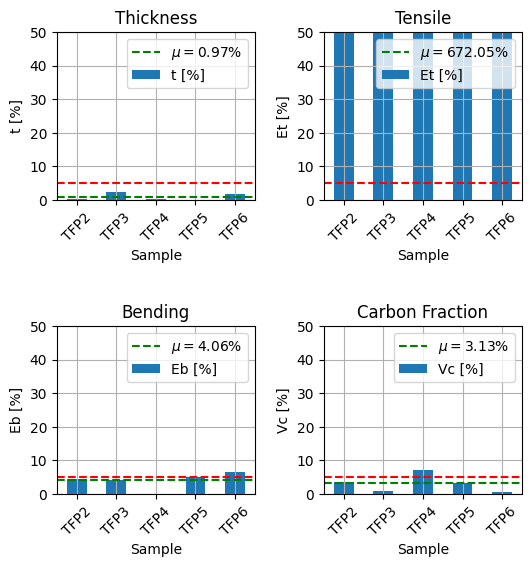

In [29]:
cols = error_df.columns

fig = plt.figure()
#padding
fig.subplots_adjust(hspace=0.75, wspace=0.35)
fig.set_size_inches(6, 6)

names_title = ["Thickness", "Tensile", "Bending", "Carbon Fraction"]
for i, col in enumerate(cols):
    ax = fig.add_subplot(2, 2, i+1)
    error_df[col].plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")
    # line 5% 
    ax.axhline(5, color='r', linestyle='--')
    # line mean 
    error_df[col].mean()
    ax.axhline(error_df[col].mean(), color='g', linestyle='--', label=r"$\mu = $"+str(round(error_df[col].mean(),2)) + "%")
    # 0,50
    plt.ylim(0,50)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.title(names_title[i])

In [20]:
df

,layers,Vc,Et [GPa],Eb [GPa],t [mm],b [mm]
,,,,,,
Name,,,,,,
TFP2,"[Y, X]",0.164,2.258503,9.869501,4.700000,25.566667
TFP3,"[Y, SX]",0.135,2.000437,9.222003,4.833333,25.400000
TFP4,"[Y, SY]",0.144,2.451362,10.181815,4.700000,25.666667
TFP5,"[Y, SX, SY]",0.146,1.626582,6.143105,5.700000,25.166667
TFP6,"[Y, X, SY]",0.180,1.739870,7.798060,5.600000,25.033333


In [21]:
df_pred

,t [mm],Et [GPa],Eb [GPa],Vc
Name,,,,
TFP2,4.714588,16.516349,10.321965,0.170068
TFP3,4.714588,15.897891,8.826960,0.133625
TFP4,4.714588,16.458371,10.181815,0.133625
TFP5,5.698783,13.731448,6.452694,0.150747
TFP6,5.698783,14.243096,7.299196,0.180896


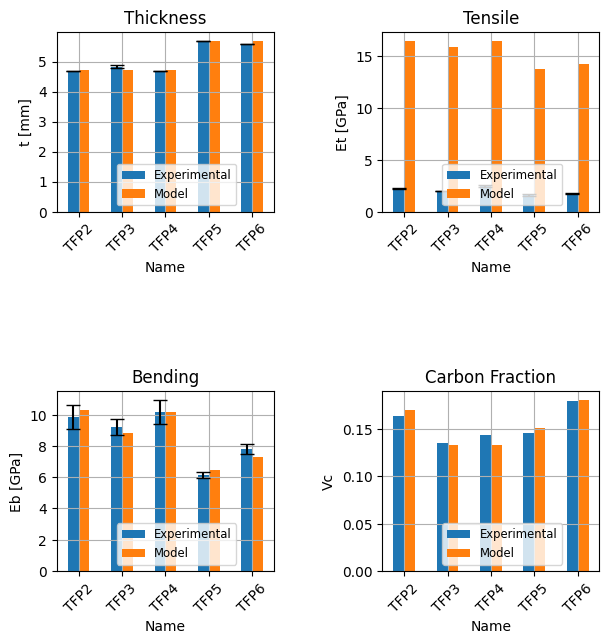

In [22]:
# plot with error bars 
fig = plt.figure()
#size
fig.set_size_inches(7, 7)

# subplot padding
fig.subplots_adjust(hspace=1., wspace=0.5)

cols = [ "t [mm]","Et [GPa]", "Eb [GPa]", "Vc"]

for i, col in enumerate(cols):

    names_leg = ["Experimental", "Model"]

    try:
        error = df_old[col]["std"]
        yerror = [error, np.nan*error]
    except:
        yerror = None
    # errror experimental
    
    pd.concat([ df[col], df_pred[col]], axis=1).plot(kind='bar', 
                                                     ax=fig.add_subplot(2, 2, i+1), capsize=5, yerr=yerror)
    plt.ylabel(col)
    # 45
    plt.xticks(rotation=45)
    plt.grid()
    # outside
    plt.legend(names_leg,loc='center left', bbox_to_anchor=(0.25, 0.15),fontsize='small')
    plt.title(names_title[i])
    